### En chaque point:
- L'id et puissance du station serveuse 
- L'ensemble des ids et puissances recues des voisignages(pr>-105dbm)
- Niveau d'interferenc, SNR, debit

### Les données : Sites BTS(id BTS,x,y)


# Chargement des modules d'analyse

In [ ]:
import pandas as p
import numpy as n
import matplotlib.pyplot as m

# Pour faire l'affichage avec la bibliothèque graphique intégrée

In [ ]:
%matplotlib inline

In [ ]:
m.rc("savefig", dpi=150)

# Chargement des données

In [ ]:
d=p.read_excel(r"C:\Users\Dell\Desktop\zzzzz\planification\projet planification\Sites.xlsx")

# Visualisation des données

### Prendre des décisions en se qui concerne la qualité des informations disponibles

In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
BtsID    42 non-null int64
X        42 non-null float64
Y        42 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.1 KB


### Avoir l'ordre de grandeur des donnees,leurs dimensions,des informations comme la moyenne ,l'ecart type,la mediane et sa dispertion par rapport à le max

In [ ]:
d.describe()

,BtsID,X,Y
count,42.000000,42.000000,42.000000
mean,20.500000,525798.321429,390254.897143
std,12.267844,6367.329290,5883.025811
min,0.000000,511410.060000,374834.060000
25%,10.250000,522804.192500,388684.950000
50%,20.500000,524560.460000,390830.255000
75%,30.750000,527891.612500,392811.497500
max,41.000000,539095.900000,402533.180000


* La relation entre les differentes variables

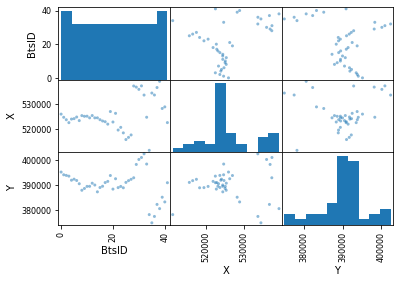

In [ ]:
p.plotting.scatter_matrix(d);

* Les correlations entre les differents variables

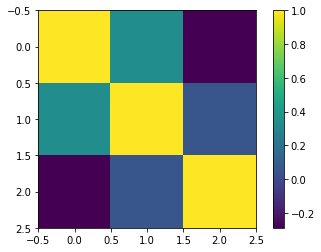

In [ ]:
m.imshow(d.corr())
m.colorbar();

# Definition des fonctions pour calculer les distances entre une point et une bts , le pathLoss et la puissance recue à ce point là
## ge,gr,pe,xmax,xmax,xmin,ymin sont des constantes qu'on peut les changer facilement au debut du programme

In [ ]:
ge=0;
gr=0;
pe=46;
xm=523570;
ym=385825;
xM=526373;
yM=393660;
def pathLoss(d):
    return  126 + 32.25*n.log10(d/n.power(10,3))
def distance(i,j,x,y):
    return n.sqrt(n.square(x-i)+n.square(y-j))
def pr(d):
    return pe+ge+gr-pathLoss(d)

# Calcule en chaque point:

* L'id et puissance du station serveuse
* L'ensemble des ids et puissances recues des voisignages(pr>-105dbm)
* Niveau d'interferenc, SNR, debit


In [ ]:
l=[]
for i in range(xm,xM,10):
    for j in range(ym,yM,10):
        a=[]; ###Liste des voisinages(BTS/pr de cette BTS>-105dbm)
        ps=-200; ###puissance du bts serveuse
        s=-1;###ID du bts serveuse
        interf=0;
        for k in range(42):
            dist=distance(i,j,d.T[k][1],d.T[k][2]);
            pw=pr(dist);
            if(pw>-105):
                a.append((d.T[k][0],pw));
                if (pw>ps):
                    ps=pw
                    s=d.T[k][0];
        for x in a:
            interf=interf+n.power(10,x[1]/10);
        interf=n.abs(interf-ps);
        snr=n.power(10,ps/10)/interf;
        debit=20*n.log2(1+snr)
        l.append((i,j,a,s,ps,snr,interf,debit))   

In [ ]:
print(len(l))

220304


## Visualisation des puissances recues en 50000 parmi les 220304 points et les bts serveuses de ces points
## Visualisation des puissances recues en 1000 parmi les 220304 et les bts serveuses de ces points
# On peut de meme visualiser tous SNR Interference Debit les bts en voisinage pour chaque point et la puissance recue de ce bts en ce point.
# En effet,L est une liste de tuple. Chaque tuple contient pour un point: 
* l'abscisse
* l'ordonnee 
* un tuple contenat lid des bts voisinages et la puissance recue de ce bts
* le niveau d'Interference
* le snr
* le debit

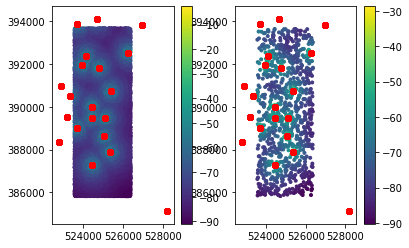

In [ ]:
g=[]
gg=[]
ggg=[]
g1=[]
g2=[]
g3=[]
k=0;
for i in range(50000):
    j=n.random.randint(len(l));
    k=l[j]
    g.append(k[0]);
    gg.append(k[1]);
    ggg.append(k[4]);
    g1.append(k[3]);
for i in g1:
    for j in range(42):
        if(d.T[j][0]==i):
            g2.append(d.T[j][1])
            g3.append(d.T[j][2])
m.subplot(1,2,1)
m.scatter(g,gg,c=ggg,marker='.')
m.colorbar();
m.scatter(g2,g3,marker='o',c='r')

m.subplot(1,2,2)
m.scatter(g[:1000:1],gg[:1000:1],c=ggg[:1000:1],marker='.')
m.colorbar();
m.scatter(g2,g3,marker='o',c='r')

# Visualisation pour 50 points la puissance recue

In [ ]:
ss=0;
for i in l:
    print(i[0],i[1],i[4])
    ss=ss+1;
    if (ss==50):
        break;
    

523570 385825 -87.3833217853367
523570 385835 -87.31274187706325
523570 385845 -87.2419413644705
523570 385855 -87.17092080161774
523570 385865 -87.09968080731593
523570 385875 -87.02822206753751
523570 385885 -86.95654533790244
523570 385895 -86.88465144624215
523570 385905 -86.81254129524362
523570 385915 -86.74021586517577
523570 385925 -86.66767621669987
523570 385935 -86.5949234937664
523570 385945 -86.52195892660046
523570 385955 -86.44878383477749
523570 385965 -86.37539963039208
523570 385975 -86.30180782132123
523570 385985 -86.22801001458487
523570 385995 -86.15400791980534
523570 386005 -86.07980335276812
523570 386015 -86.00539823908602
523570 386025 -85.93079461796856
523570 386035 -85.85599464609885
523570 386045 -85.78100060162012
523570 386055 -85.70581488823322
523570 386065 -85.630440039408
523570 386075 -85.55487872270922
523570 386085 -85.4791337442399
523570 386095 -85.40320805320286
523570 386105 -85.32710474658248
523570 386115 -85.25082707394824
523570 386125 -8

In [ ]:
ge=0;
gr=0;
pe=46;
xm=0;
ym=0;
xM=6;
yM=6;
def pathLoss(d):
    return  126 + 32.25*np.log10(d/np.power(10,3))
def distance(i,j,x,y):
    return np.sqrt(np.square(x-i)+np.square(y-j))
def pr(d):
    return pe+ge+gr-pathLoss(d)

def poisson(ld,instant):
    return np.power(ld,instant)*np.exp((-1)*ld)/math.factorial(instant)
def expo(ld,instant):
    return ld*np.exp((-1)*lambd*instant) 

profil=-1;###profil=0 pieton de vitesse 3km/h ******profil=1 en voiture de vitesse 50km/h
for t in range(3600):
    nbarri=poisson(ld,t);
    for j in range(1,nbarri+1):
        profil=np.random.randint(2)
            x=np.random.randint(xm);
            y=np.random(ym);
            dist=distance(x,y,)
            while(dist<6):